# K-means from scratch
References : 
- Basis of K-means : https://en.wikipedia.org/wiki/K-means_clustering#History
- Initialisation : https://en.wikipedia.org/wiki/K-means%2B%2B
- So-called Lloyd's Algorith : https://en.wikipedia.org/wiki/Lloyd%27s_algorithm
- Voronoï Diagram : https://en.wikipedia.org/wiki/Voronoi_diagram
- Implementation in Scikit-Learn : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

K-means is one of the most famous algorithm of datascience. How to cluster unlabeled data ?
First let's explain than code the naive version, then we will see how we can do improvement to build the interesting tool that nowedays everyone uses.


## Vanilla K-means

### Making function for creating dataset for naive version of 2D K-means

In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import time
from utils import *

def create_n_clusters(n):
    return [rd.random()*10 for i in range(n)],[rd.random()*10 for i in range(n)]
def create_dataset(clusters,nb_points):
    N_clusters=len(clusters[0])
    X=[0 for i in range(nb_points)]*N_clusters
    Y=[0 for i in range(nb_points)]*N_clusters
    for k in range(N_clusters):
        for l in range(nb_points):
            centroïd_x,centroïd_y=clusters[0][k],clusters[1][k]
            X[k*nb_points+l]=rd.random()-0.5 + centroïd_x 
            Y[k*nb_points+l]=rd.random()-0.5 + centroïd_y 
    return X,Y
    

### Utilitary fonction for Voronoï diagram
*refers to utils.py*

### Lloyd's Algorithm

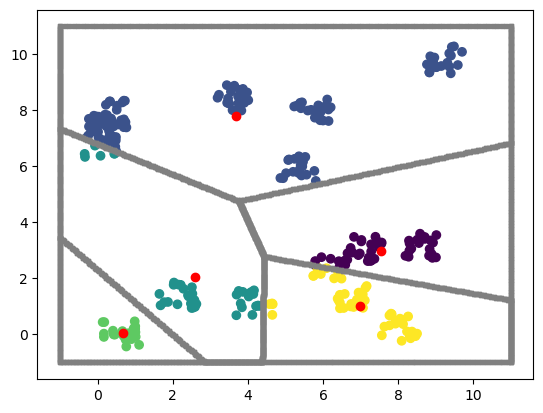

In [3]:
n=5
n2=2
box_frame=[[-1,-1,11,11],[-1,11,11,-1]]
box_clusters=create_n_clusters(n)
box_clusters_bis=create_n_clusters(n2*n)
dataset=create_dataset([box_clusters[0]+box_clusters_bis[0],box_clusters[1]+box_clusters_bis[1]],20)
v=voronoï(box_frame,box_clusters)

plot_voronoï(dataset,v,box_frame) # plot the voronoï (coded from scratch thanks to hundreds of lines above)

### Lloyd's iterations

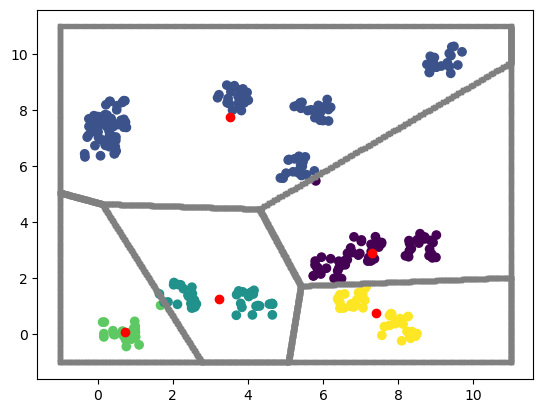

In [4]:
for i in range(10):
    v=voronoï(box_frame,get_means(dataset,v))

# K-means after 10 iterations of LLoyd's Algorithm
plot_voronoï(dataset,v,box_frame)

# plt.savefig(fig)

In [5]:
def silhouette(dataset,v):
    n=len(dataset[0])
    a,b,s=[0]*n,[0]*n,[0]*n
    labels=points_classification(dataset,v)
    for i in range(n):
        eps=10**(-15)
        x,y=dataset[0][i],dataset[1][i]
        mask_a=[labels[j]==labels[i] for j in range(n)]
        mask_b=[not e for e in mask_a]
        n_a=sum([1 for i in range(n) if mask_a[i]])
        n_b=n-n_a
        a[i]=sum([(x-dataset[0][i])**2+(y-dataset[1][i])**2 for i in range(n) if mask_a[i]])/(n_a+eps)
        b[i]=sum([(x-dataset[0][i])**2+(y-dataset[1][i])**2 for i in range(n) if mask_b[i]])/(n_b+eps)
    s=[(b[i]-a[i])/float(max(np.array(b)-np.array(a))) for i in range(n)]        
    return sum(s)/n

In [6]:
N=10
WWS,S=[],[]
for k in range(1,N):
    v=voronoï(box_frame,random_init_lloyd(k,box_frame))
    for i in range(100):
        v=voronoï(box_frame,get_means(dataset,v))
    WWS.append(within_sum_square(dataset,v))
    S.append(silhouette(dataset,v))

x=[i for i in range(1,N)]




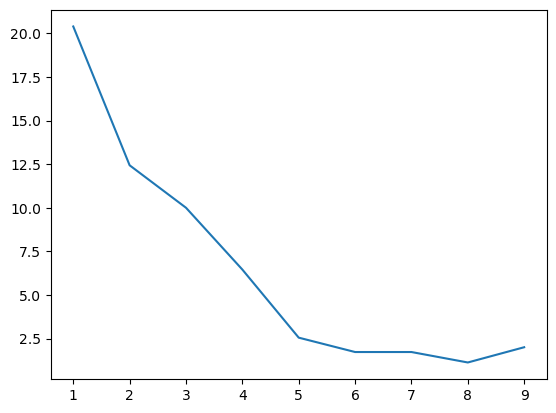

In [7]:
plt.plot(x,WWS)


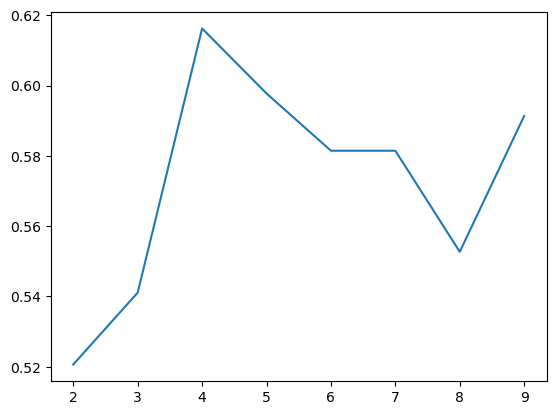

In [8]:
plt.plot(x[1:N],S[1:N])

## Recap : 


We coded k-means from scratch, and did with a naïve synthetic dataset :
- How to create Voronoï diagram from a list of points
- How to update Voronoï diagram with LLoyd's Algorythm
- The elbow and silhouette methods can be used to anlyse which k is the best, depending of dataset
  

Of course [Scikit-Learn K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) is already coded and works much better. For instance the initialisation can be [‘k-means++’](https://en.wikipedia.org/wiki/K-means%2B%2B) to converge faster, minibatch is usefull to reduce computation time on large dataset, and a variant of Lloyd's algorithm is available.

Coding everything from scratch without any AI help is just an exercice for sharpening coding skill. 
Like sometime we need to go running instead of driving to stay healthy.



To go further : 
- Use a real dataset
- Better initialisation of K-means
- Optimize the cost of computation (parallelisation/avoid "for", avoid redundancy in calculations)